<a href="https://colab.research.google.com/github/Bayrkdartech/Binder/blob/main/PMJE_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 الملف موجود مسبقًا ولن يتم إعادة التحميل.
✅ الملفات مفكوكة مسبقًا.
أول 5 صفوف من البيانات:
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0
Datetime    0
AEP_MW      0
dtype: int64
                      AEP_MW
Datetime                    
2014-11-02 02:00:00  12994.0
2014-11-02 02:00:00  13190.0
2015-11-01 02:00:00  10785.0
2015-11-01 02:00:00  10542.0
2016-11-06 02:00:00  10964.0
2016-11-06 02:00:00  11008.0
2017-11-05 02:00:00  10596.0
2017-11-05 02:00:00  10446.0
The duplicated: 0
Datetime
2008-12-31 01:00:00   729 days 01:00:00
2017-12-31 01:00:00   729 days 01:00:00
2012-12-31 01:00:00   729 days 01:00:00
2009-12-31 01:00:00   729 days 01:00:00
2013-12-31 01:00:00   729 days 01:00:00
2016-12-31 01:00:00   729 da

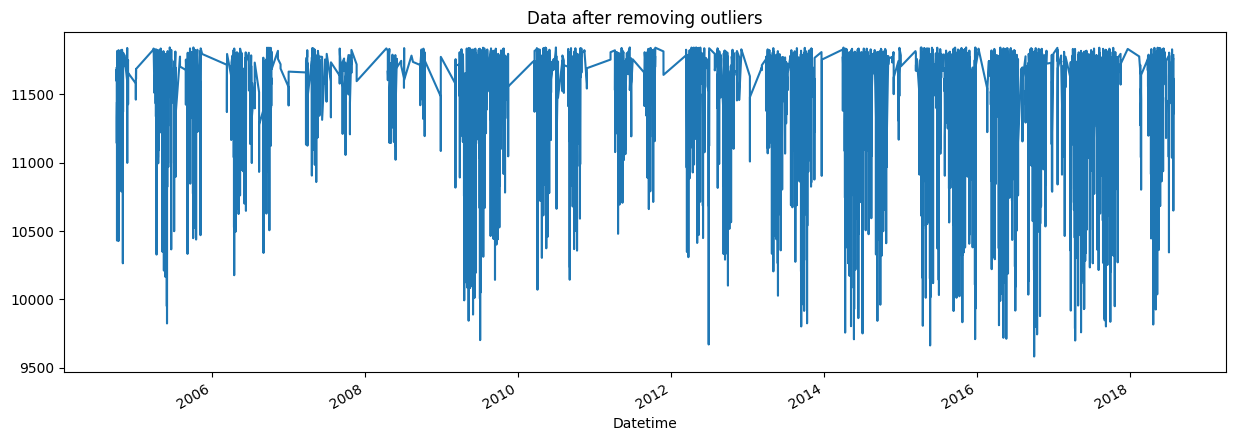

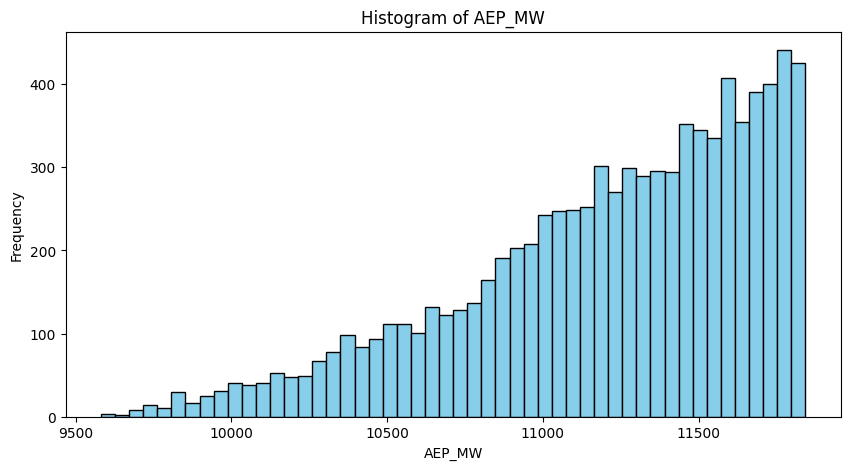

/tmp/ipython-input-2230428491.py:114: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['AEP_MW'], shade=True, color='orange')


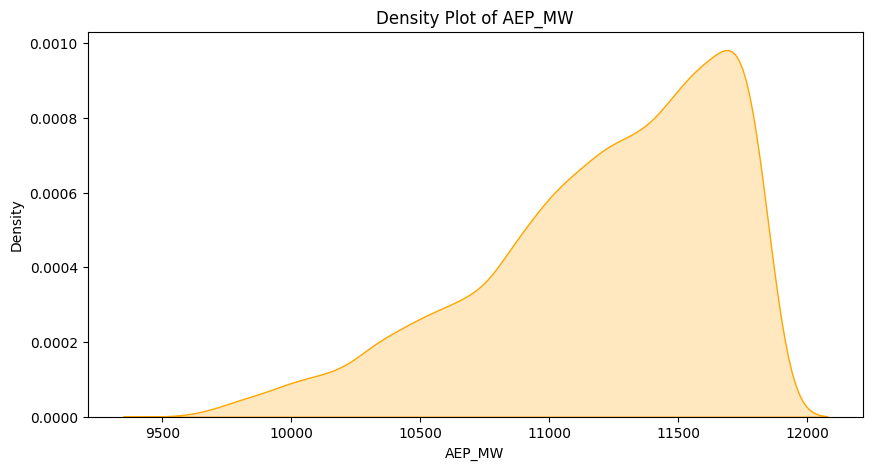

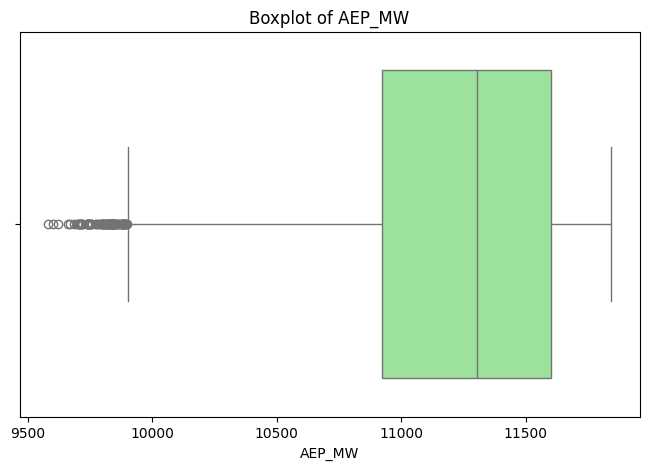

Mean: 11209.789437109104
Median: 11302.0
Standard Deviation: 477.96040094753937


In [4]:
# استيراد المكتبات الأساسية
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import os
from google.colab import drive

# 1. توصيل Google Drive
drive.mount('/content/drive')

# 2. إعداد مجلد kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# 3. نسخ ملف kaggle.json من Google Drive إلى مجلد kaggle
# غيّر المسار إذا ملف kaggle.json موجود بمكان آخر
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/

# 4. ضبط الأذونات
!chmod 600 /root/.kaggle/kaggle.json

# 5. إنشاء مجلد data إذا غير موجود
os.makedirs("data", exist_ok=True)

# 6. تحميل البيانات من Kaggle إذا غير موجودة
if not os.path.exists("data/hourly-energy-consumption.zip"):
    !kaggle datasets download -d robikscube/hourly-energy-consumption -p data -q
else:
    print("📂 الملف موجود مسبقًا ولن يتم إعادة التحميل.")

# 7. فك الضغط (بدون رسائل)
if not os.path.exists("data/AEP_hourly.csv"):  # نتأكد إذا تفك الضغط سابقًا
    !unzip -q data/hourly-energy-consumption.zip -d data
else:
    print("✅ الملفات مفكوكة مسبقًا.")

# 8. قراءة ملف CSV مثال
df = pd.read_csv("data/AEP_hourly.csv")
print("أول 5 صفوف من البيانات:")
print(df.head())


# FIRST STEP ### Exlore the missing values

print(df.isna().sum())

# step 2 #### turn the column to datetimeindex
df['Datetime']= pd.to_datetime(df['Datetime'])
df.sort_values('Datetime')
df.set_index('Datetime', inplace= True)
df.resample('h').mean()

#Step 3 ### Explore the duplicated values
duplicated= df[df.index.duplicated(keep=False )]

print(duplicated)

df=df[~df.index.duplicated(keep='first')]
print('The duplicated:',df.index.duplicated().sum())

# Explore the time gaps
time_off= df.index.to_series().diff()
print(time_off.sort_values(ascending=False).head(10))
#Clean the gaps

max_gaps= pd.Timedelta(days=1)

gaps= df.index.to_series().diff()> max_gaps
df_cleaned= df[~gaps]
print(df_cleaned.head())
print(df_cleaned.tail())

df= df.resample('h').mean()
df= df.interpolate(methode= 'time')

#Explore the outliers

Q1= df['AEP_MW'].quantile(0.25)
Q3= df['AEP_MW'].quantile(.75)

IQR= Q3 - Q1
outliers= df[(df['AEP_MW']< Q1 - 1.5*IQR)| (df['AEP_MW']> Q3 + 1.5*IQR)]
print(outliers)
lower_bound= Q1- 1.5*IQR
upper_bound= Q3- 1.5*IQR
df_cleaned= df[~((df['AEP_MW']< lower_bound)| (df['AEP_MW']> upper_bound))]



print("Number of outliers removed:", len(df)- len(df_cleaned))
df_cleaned['AEP_MW'].plot(figsize=(15,5), title='Data after removing outliers')
# staticsit work
# وصف البيانات
df_cleaned['AEP_MW'].describe()



plt.figure(figsize=(10,5))
plt.hist(df_cleaned['AEP_MW'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of AEP_MW')
plt.xlabel('AEP_MW')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10,5))
sns.kdeplot(df_cleaned['AEP_MW'], shade=True, color='orange')
plt.title('Density Plot of AEP_MW')
plt.xlabel('AEP_MW')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['AEP_MW'], color='lightgreen')
plt.title('Boxplot of AEP_MW')
plt.show()

mean_value = df_cleaned['AEP_MW'].mean()
median_value = df_cleaned['AEP_MW'].median()
std_value = df_cleaned['AEP_MW'].std()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_value}")